Diabetes ML model- by Hossein Basereh Taramsari

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
# Dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]  
y = dataset[:,8] 

In [12]:
#Scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
# Seperate the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)


In [15]:
# Creating the model

model = Sequential()
model.add(Dense(12,input_shape=(8,),activation="relu")) #12 layers
model.add(Dense(8,activation="relu")) #8 more layers
model.add(Dense(1,activation="sigmoid")) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
#Fitting the model
model_out = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10)


Epoch 1/150
70/70 [==============================] - 1s 4ms/step - loss: 0.7354 - accuracy: 0.4573 - val_loss: 0.6845 - val_accuracy: 0.5714
Epoch 2/150
70/70 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6425 - val_loss: 0.6261 - val_accuracy: 0.6494
Epoch 3/150
70/70 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.7164 - val_loss: 0.5759 - val_accuracy: 0.6234
Epoch 4/150
70/70 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7366 - val_loss: 0.5453 - val_accuracy: 0.6364
Epoch 5/150
70/70 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7424 - val_loss: 0.5308 - val_accuracy: 0.6364
Epoch 6/150
70/70 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7598 - val_loss: 0.5220 - val_accuracy: 0.6494
Epoch 7/150
70/70 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7713 - val_loss: 0.5162 - val_accuracy: 0.6753
Epoch 8/150
7

Epoch 59/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8191 - val_loss: 0.5660 - val_accuracy: 0.6883
Epoch 60/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8263 - val_loss: 0.5678 - val_accuracy: 0.6623
Epoch 61/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8234 - val_loss: 0.5695 - val_accuracy: 0.6494
Epoch 62/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8220 - val_loss: 0.5610 - val_accuracy: 0.6623
Epoch 63/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8220 - val_loss: 0.5724 - val_accuracy: 0.6623
Epoch 64/150
70/70 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8205 - val_loss: 0.5696 - val_accuracy: 0.6494
Epoch 65/150
70/70 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8220 - val_loss: 0.5716 - val_accuracy: 0.6623
Epoch 

In [18]:
# Evaluating of data
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:%.2f" % (accuracy*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6494
Accuracy:64.94


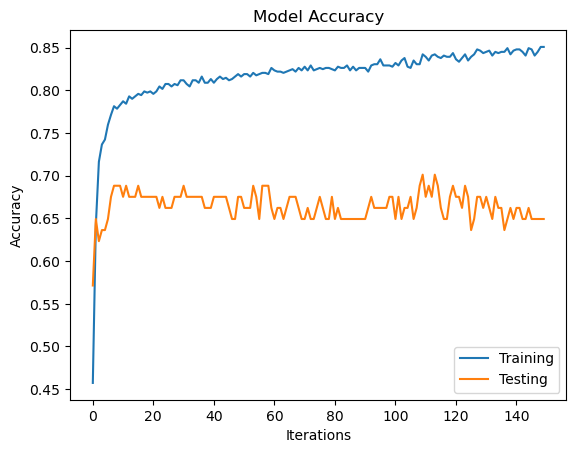

In [19]:
# Plotting the model accuracy
plt.plot(model_out.history["accuracy"])
plt.plot(model_out.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(["Training", "Testing"])
plt.show()